# Notebook 03 - Data Cleaning

## Objectives
* Clean data
* Evaluate and process missing data

## Inputs
* outputs/datasets/collection/HousePricesRecords.csv

## Outputs
* Create Clean dataset:
    * all new datasets of cleaning will be stored in inputs/datasets/cleaning
* Split created dataset in to 2 parts:
    * Train
    * Test
* all new datasets (train and test) will be stored in outputs/datasets/cleaned

## Change working directory
In This section we will get location of current directory and move one step up, to parent folder, so App will be accessing project folder.

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("you have set a new current directory")

you have set a new current directory


Confirm new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5'

## Loading Dataset

In [4]:
import pandas as pd

df = pd.read_csv("outputs/datasets/collection/HousePricesRecords.csv")
df.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,0,856,854.0,3.0,No,706,GLQ,150,0.0,548,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,3,961,NaN,NaN,No,216,ALQ,540,NaN,642,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


Will make a copy of dataset, so later it can be compared with cleaned one

## Exploring Data

We will get all features that are missing data as a list

In [5]:
features_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
features_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

### Visualizing Missing Data

Visualize the missing data to better understand the pattern of missingness.

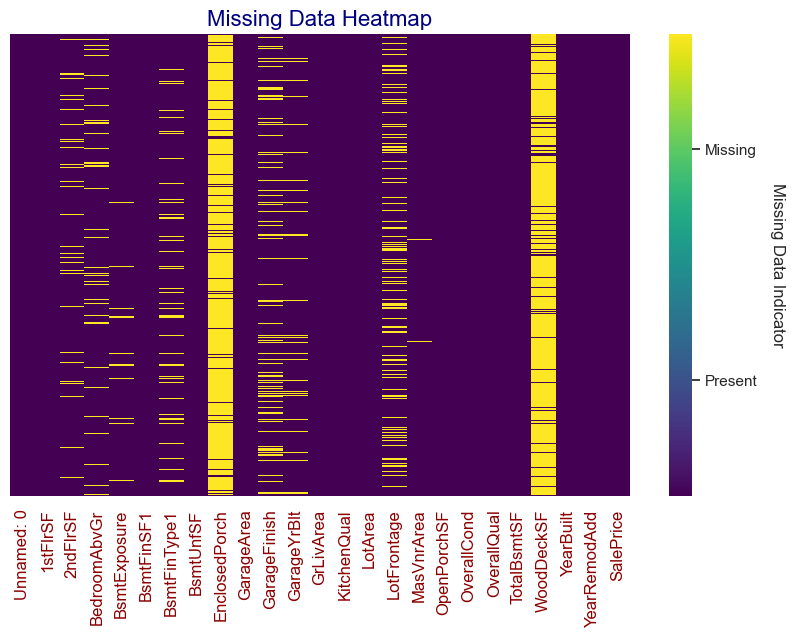

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background style
sns.set(style="white")

# Prepare the data for heatmap, converting True/False to integers for color mapping
heatmap_data = df.isnull().astype(int)

# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
# Using `cbar=True` to show the color bar
ax = sns.heatmap(heatmap_data, yticklabels=False, cbar=True, cmap='viridis',
                 cbar_kws={'label': 'Missing Data Indicator'})

# Customize the plot with titles and labels as needed
plt.title('Missing Data Heatmap', fontsize=16, color='navy')
plt.xticks(fontsize=12, color='darkred')  # Set x-tick colors to dark red
plt.yticks(fontsize=12, color='darkred')  # Set y-tick colors to dark red

# Set color bar label and style
cbar = ax.collections[0].colorbar
cbar.set_label('Missing Data Indicator', rotation=270, labelpad=20)
cbar.set_ticks([0.25, 0.75])  # Setting tick positions
cbar.set_ticklabels(['Present', 'Missing'])  # Setting tick labels

# Show the plot
plt.show()


We will generate a profiling report for features with missing data, which will assist us in selecting the most effective method for data cleaning.

In [7]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df=df[features_with_missing_data], minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## All Data Cleaning

All Data cleaning with all steps, graphs, etc. will be performed in folder jupyter_notebooks/data_cleaning/

* All this is because we have noticed quite a few missing data vales, also we need to perform more deep checking on data is it all correct and valid.
* After All cleaning and fixing data in folder jupyter_notebooks/data_cleaning is completed, we will import inputs/datasets/cleaning/clean_finished.csv as current dataframe

When jupyter_notebooks/data_cleaning is being processed, we will add cleaning code below

In [8]:
df.loc[:, 'LotFrontage'] = df['LotFrontage'].fillna(value=df['LotFrontage'].mean())
df['LotFrontage'] = df['LotFrontage'].round().astype(int)

n_a_0=['2ndFlrSF','BedroomAbvGr', 'GarageArea', 'GarageYrBlt', 'WoodDeckSF', 'MasVnrArea', 'EnclosedPorch']
df[n_a_0] = df[n_a_0].fillna(0)
n_a_n = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish']
df[n_a_n] = df[n_a_n].fillna('None')
float_to_int = ['2ndFlrSF','BedroomAbvGr', 'GarageYrBlt', 'MasVnrArea', 'EnclosedPorch', 'WoodDeckSF']
df[float_to_int] = df[float_to_int].astype(int)

# Floors
indexes = df['2ndFlrSF'] > df['1stFlrSF']
df.loc[indexes, ['1stFlrSF', '2ndFlrSF']] = df.loc[indexes, ['2ndFlrSF', '1stFlrSF']].values

# Bedrooms
df.loc[(df['2ndFlrSF'] == 0) & (df['BedroomAbvGr'] == 0), 'BedroomAbvGr'] = 2
df.loc[(df['2ndFlrSF'] > 0) & (df['BedroomAbvGr'] == 0), 'BedroomAbvGr'] = 3

# Define basement-related features and their 'no presence' values
features_and_values = {
    "BsmtExposure": "None",
    "BsmtFinType1": "None",
    "BsmtFinSF1": 0,
    "BsmtUnfSF": 0,
    "TotalBsmtSF": 0
}

def check_and_correct_consistency(df, features_and_values):
    # Check and correct each feature
    for feature, no_value in features_and_values.items():
        # Determine if the feature's value indicates 'no presence'
        df['Consistency'] = df.apply(
            lambda row: row[feature] != no_value or all(row[f] == features_and_values[f] for f in features_and_values if f != feature),
            axis=1)
        # Identify inconsistent records and correct them using the mode value of the feature
        inconsistent_indices = df[~df['Consistency']].index
        if not inconsistent_indices.empty:
            mode_value = df[feature].mode()[0]  # Find the mode that isn't the 'no presence' value
            df.loc[inconsistent_indices, feature] = mode_value

# Apply the consistency check and correction function
check_and_correct_consistency(df, features_and_values)

df.loc[(df['BsmtUnfSF'] == 0), 'BsmtUnfSF'] = df['TotalBsmtSF'] - df['BsmtFinSF1']
df.loc[(df['BsmtFinSF1'] == 0), 'BsmtFinSF1'] = df['TotalBsmtSF'] - df['BsmtUnfSF']
df.loc[(df['TotalBsmtSF'] == 0), 'TotalBsmtSF'] = df['BsmtUnfSF'] + df['BsmtFinSF1']
df['BsmtAreaCheck'] = (df['BsmtFinSF1'] + df['BsmtUnfSF'] == df['TotalBsmtSF'])

# Calculate and assign the ratio for records that meet consistency criteria
df['Fin_Unf_Ratio'] = None  # Initialize the column
consistent_mask = (df['BsmtFinSF1'] + df['BsmtUnfSF'] == df['TotalBsmtSF']) & (df['BsmtUnfSF'] != 0)
df.loc[consistent_mask, 'Fin_Unf_Ratio'] = df['BsmtFinSF1'] / df['BsmtUnfSF']

# Compute the overall average ratio from the consistent records
overall_ratio = df.loc[consistent_mask, 'Fin_Unf_Ratio'].mean()

# Adjust inconsistent records using the overall ratio
inconsistent_mask = (df['BsmtFinSF1'] + df['BsmtUnfSF'] != df['TotalBsmtSF'])
df.loc[inconsistent_mask, 'BsmtUnfSF'] = (df['TotalBsmtSF'] / (overall_ratio + 1)).astype(int)
df.loc[inconsistent_mask, 'BsmtFinSF1'] = df['TotalBsmtSF'] - df.loc[inconsistent_mask, 'BsmtUnfSF']

# Define a dictionary for feature-specific 'no presence' indicators
features_and_values = {
    "GarageArea": 0,
    "GarageFinish": 'None',
    "GarageYrBlt": 0
}

def check_consistency(df, primary_feature):
    #Checks and returns rows where the consistency of a primary feature with other related features fails.
    if primary_feature not in features_and_values:
        print(f"Feature {primary_feature} not defined in feature settings.")
        return pd.DataFrame()  # Return an empty DataFrame for safety
    # Applying consistency check
    df['Consistency'] = df.apply(
        lambda row: row[primary_feature] != features_and_values[primary_feature] or all(
            row[f] == (features_and_values[f] if f != primary_feature else row[f]) for f in features_and_values
        ), axis=1)
    # Displaying and correcting inconsistent records
    inconsistent_records = df[~df['Consistency']]
    if not inconsistent_records.empty:
        mode_value = df[primary_feature].mode()[0]
        df.loc[~df['Consistency'], primary_feature] = mode_value
    return inconsistent_records

columns_of_interest = ['GarageArea', 'GarageFinish', 'GarageYrBlt']
inconsistencies = check_consistency(df, 'GarageFinish')
df.loc[df['GarageYrBlt'] < df['YearBuilt'], 'GarageYrBlt'] = df['YearBuilt']

from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_columns(df, columns):
    le = LabelEncoder()
    df[columns] = df[columns].apply(lambda x: le.fit_transform(x))
    return df

# Usage example in one line to encode multiple columns
df = encode_columns(df, ['BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'GarageFinish'])

# Removing Extra columns that originally do not belong to dataset, as we have created them
df_original_features = pd.read_csv("outputs/datasets/collection/HousePricesRecords.csv")

# Identify columns in df that are also in df_original
common_columns = df.columns.intersection(df_original_features.columns)
df = df[common_columns]

During cleaning, we did not drop any features, even some of them were missing nearly 90% of data.
We keep them to explore any potential correlations.

## Data Splitting to Train and Test

In [9]:
import os
from sklearn.model_selection import train_test_split

# Ensure output directories exist
output_dir = 'outputs/datasets/cleaned'
os.makedirs(output_dir, exist_ok=True)  # Creates the directory if it does not exist

# No need to separate features and target just yet, keep the dataframe whole for the split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=13)

# Save the datasets to CSV files including 'SalePrice'
df_train.to_csv(f'{output_dir}/train.csv', index=False)
df_test.to_csv(f'{output_dir}/test.csv', index=False)


## Correlation Study

We will explore correlation (pearson and spearman methods) of Sales Price and all the rest features, sort values by absolute value and see most correlated features

In [10]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
GarageYrBlt     0.613019
1stFlrSF        0.610308
TotalBsmtSF     0.602725
YearRemodAdd    0.571159
KitchenQual    -0.569857
OpenPorchSF     0.477561
Name: SalePrice, dtype: float64

In [11]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
1stFlrSF        0.625522
GarageArea      0.623431
TotalBsmtSF     0.613581
KitchenQual    -0.589189
YearBuilt       0.522897
GarageYrBlt     0.508371
YearRemodAdd    0.507101
MasVnrArea      0.472614
Name: SalePrice, dtype: float64

Both methods showed some high and moderate levels of correlation between SalePrice and given features (variables).
We will keep all values where correlation is 0.6 from both methods

In [12]:
features_to_study = list(set(corr_spearman[:7].index.to_list() + corr_pearson[:5].index.to_list()))
features_to_study

['GarageYrBlt',
 'GarageArea',
 'GrLivArea',
 '1stFlrSF',
 'OverallQual',
 'YearBuilt',
 'TotalBsmtSF']

We have a list of features we will be investigating:
* 1stFlrSF
* GarageArea
* GarageYrBlt
* GrLivArea
* OverallQual
* TotalBsmtSF
* YearBuilt



## EDA on selected features

We will create separate dataframe just with selected features + SalePrice

In [13]:
df_eda = df.filter(features_to_study + ['SalePrice'])
df_eda.head()

,GarageYrBlt,GarageArea,GrLivArea,1stFlrSF,OverallQual,YearBuilt,TotalBsmtSF,SalePrice
0,2003,548,1710,856,7,2003,856,208500
1,1976,460,1262,1262,6,1976,1262,181500
2,2001,608,1786,920,7,2001,920,223500
3,1998,642,1717,961,7,1915,756,140000
4,2000,836,2198,1145,8,2000,1145,250000


We will check how each feature is distributed against the Price, so we can see correlations

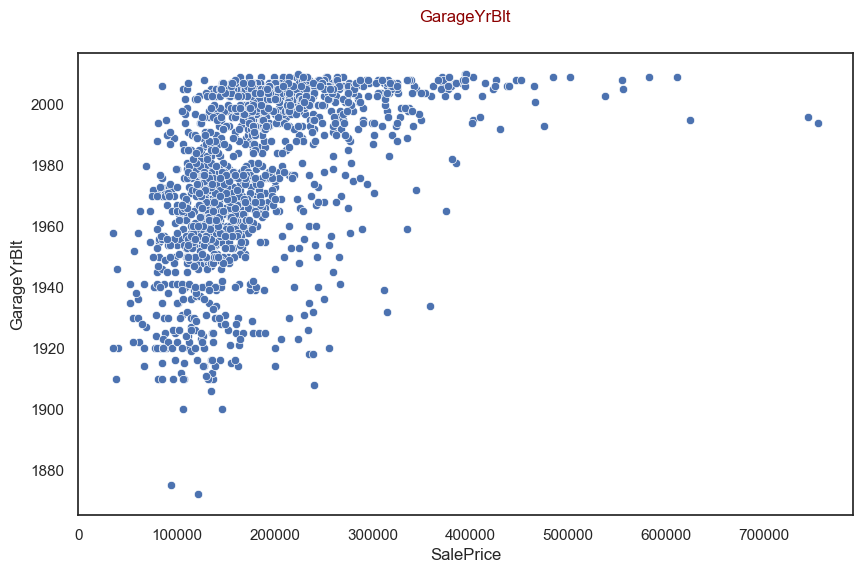

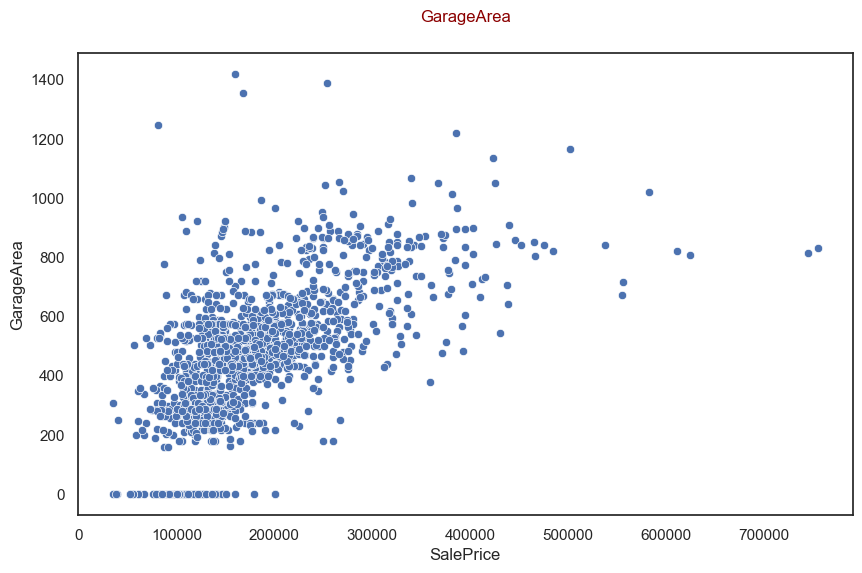

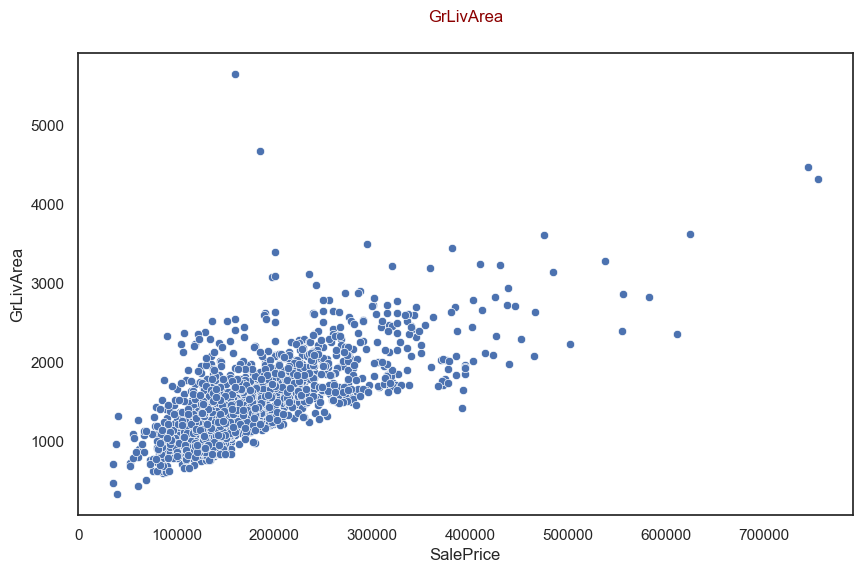

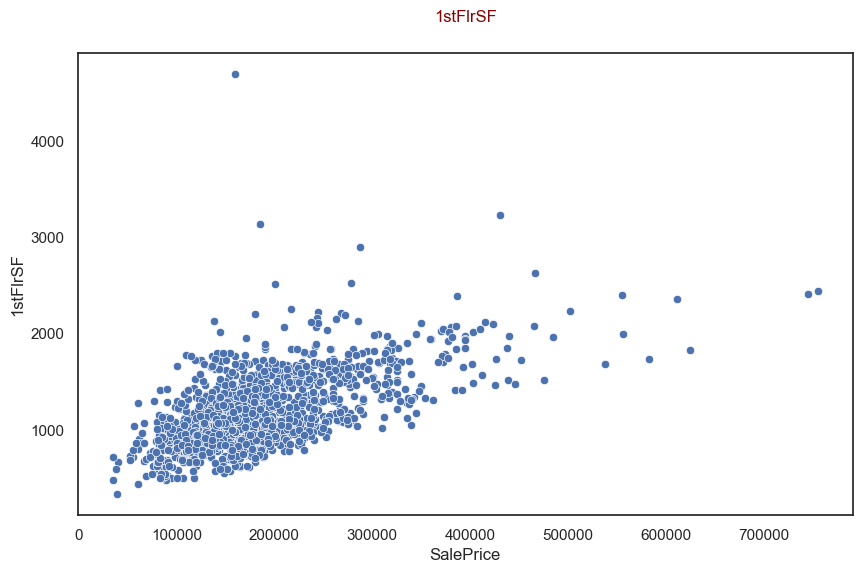

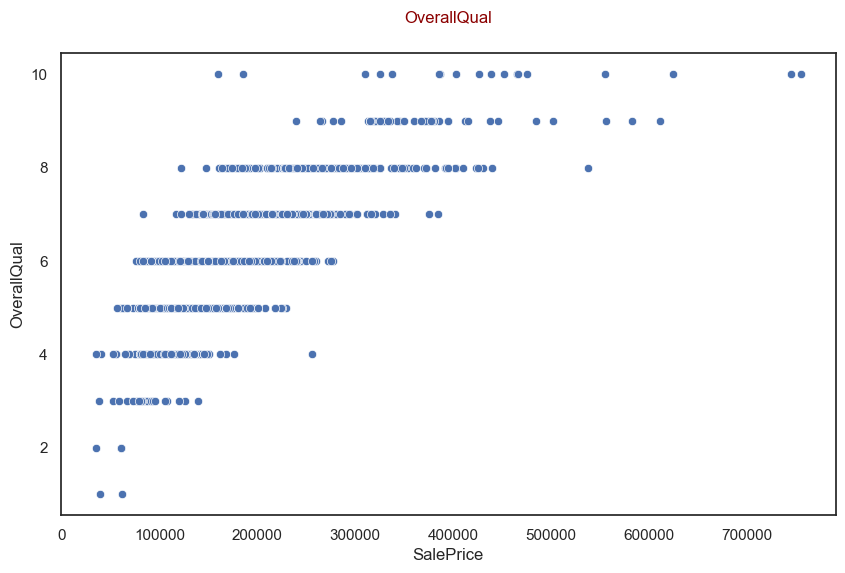

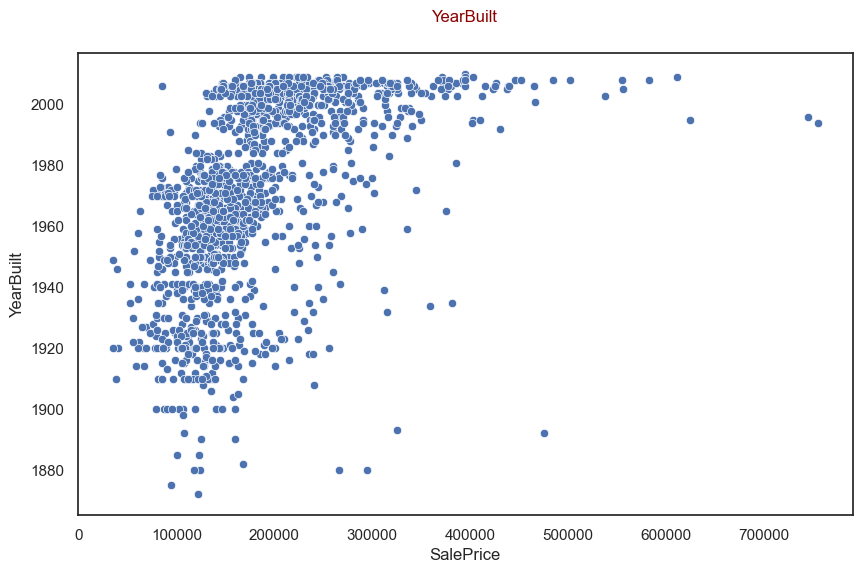

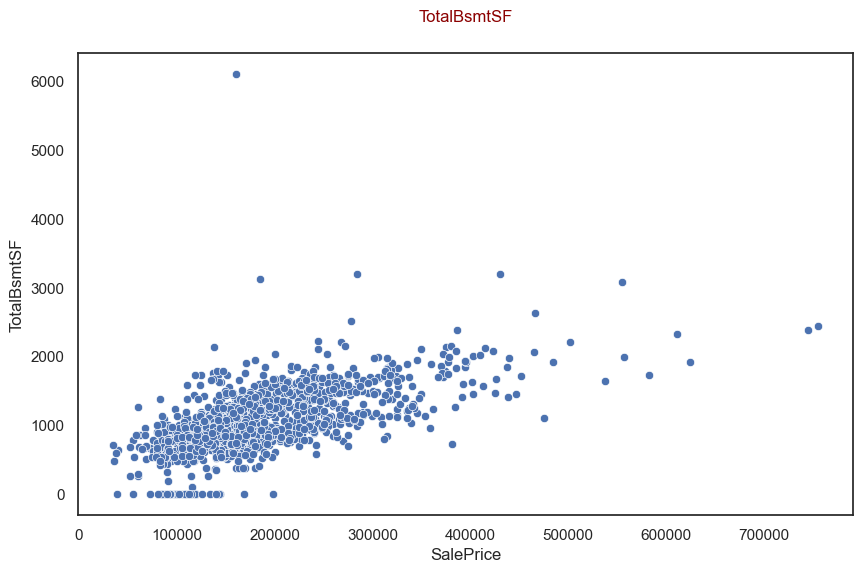

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

def plot_numerical_features(df, col, target):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=target, y=col)
    plt.title(col, fontsize=12, color='darkred', y=1.05)
    plt.show()

target = 'SalePrice'

for col in features_to_study:
    plot_numerical_features(df, col, target)
    print("\n\n")

## Hypothesis

Based on Plots above we can conclude these points:
* TotalBsmtSF - By increasing Basement we are increasing SalePrice
* 1stFlrSF - By increasing 1st floor living area Sale Price tends to increase
* YearBuilt - By increasing Garage Year Built we are increasing SalePrice, but it looks more exponential after 1980 ish...
* GarageYrBlt - This is very similar to YearBuilt, maybe because most of the garages were built same date as houses?
* OverallQual - Overall Quality is most correlated feature from all, and when it increases, SalePrice also increases
* GrLivArea - Increasing Ground Living Area SalePrice also increases
* 1stFlrSF - Similar to Ground Living Area, when it goes up, SalePrice also increases
* GarageArea - When Garage Area goes up, Sale Price also increase. Most of the houses without garages are 150.000 or less


## Next is Feature Engineering